## 통계학특강 중간고사 대체과제

**20182215오혜린**

# Subject: Titanic survivor prediction

Reason to choose: 
\
I understand that the Titanic survivor prediction example is a famous for people who are just beginning to learn machine learning.
I was interested in it, but I couldn't do it because I'm not confident. But, I decided that take this opportunity to challenge myself.


# 1. Data Identification

In this example, I'm going to use a Nympy(Numerical Python) for fast computation, and I'm going to use the Pandas for easy data processing.
\
And I will also use the visualization programs Matplotlib and Seaborn.

In [1]:
# Data input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('./titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Variables Description

1. PassengerId: Eigenvalues
2. Survival: Survival(0 = No, 1 = Yes)
3. Pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
4. Name, sex, Age
5. Sibsp: Number of siblings / spouses aboard the Titanic (같이 탑승한 형제자매, 배우자 인원수)
6. Parch: Number of parents / children aboard the Titanic	
7. Ticket: Ticket number	
8. Fare: Passenger fare
9. Cabin: Cabin number	
10. embarked: Port of Embarkation (	C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
data.shape

(891, 12)

In [3]:
# Data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data can be found to have a total of 12 variables and 891 rows.
And it can be seen that some missing values exist.(Age, Cabin, Embarked)

# 2. Data Processing

## 2-1. Missing Value
If there are missing values, it is difficult to perform machine learning, so I will replace them with appropriate values or delete rows.

In [4]:
# 'Age' NaN <-- average of 'Age'
data['Age'].fillna(data['Age'].mean(), inplace = True)

# 'Cabin' NaN <-- 'NA'
data['Cabin'].fillna('NA',inplace = True)

# delete'Embarked' NaN rows
data = data.dropna(axis = 0, subset=['Embarked'], how='any')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


Next, I will process each variable to facilitate analysis.

## 2-2. Processing Variable

In crisis situations, women, children, and the elderly are rescued first, so I will look at the extent of survival and death depending on gender and age first.

### Sex

In [6]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: Survived, dtype: int64

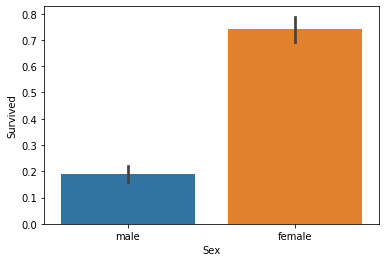

In [7]:
sns.barplot(x = 'Sex', y = 'Survived', data = data)

Since the variable appears to have a significant impact on survival(Male survival rates are lower.), I will convert it to numerical values to make it easier to analyze.

In [8]:
def sex(data):
    data.loc[(data['Sex'] == 'male'), 'Sex'] = 0
    data.loc[(data['Sex'] == 'female'), 'Sex'] = 1
    data['Sex'] = data['Sex'].astype(int)

sex(data)

### Age

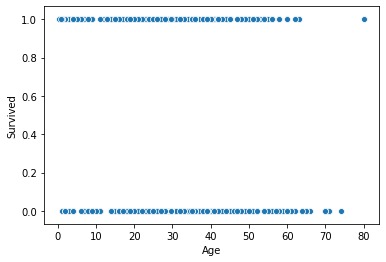

In [9]:
sns.scatterplot(x = 'Age', y = 'Survived', data = data)

'Age' is not clearly visible, so I will group the variables.

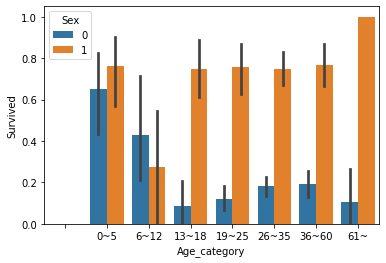

In [10]:
def category(age):
    cat = ''
    if age <= -1: cat = ' '
    elif age <= 5: cat = '0~5'
    elif age <= 12: cat = '6~12'
    elif age <= 18: cat = '13~18'
    elif age <= 25: cat = '19~25'
    elif age <= 35: cat = '26~35'
    elif age <= 60: cat = '36~60'
    else : cat = '61~'
    
    return cat

group_names = [' ', '0~5', '6~12', '13~18', '19~25', '26~35', '36~60', '61~']

data['Age_category'] = data['Age'].apply(lambda x : category(x))
sns.barplot(x = 'Age_category', y = 'Survived', hue = 'Sex', data = data, order = group_names)
data.drop('Age_category', axis=1, inplace=True)

Check the survival rate by age and gender, you can see that the survival rate of men and women was mostly high at an early age without much difference, but after the age of 13, the survival rate of men was significantly lower.
\
That is, there is a difference in survival rates by age. I will categorize 'Age' variable like this.

In [11]:
def age(data):
    data.loc[data['Age'] <= 5, 'Age_C'] = 0
    data.loc[(data['Age'] > 5) & (data['Age'] <= 12), 'Age_C'] = 1
    data.loc[(data['Age'] > 12) & (data['Age'] <= 18), 'Age_C'] = 2
    data.loc[(data['Age'] > 18) & (data['Age'] <= 25), 'Age_C'] = 3
    data.loc[(data['Age'] > 25) & (data['Age'] <= 35), 'Age_C'] = 4
    data.loc[(data['Age'] > 35) & (data['Age'] <= 60), 'Age_C'] = 5
    data.loc[data['Age'] > 60, 'Age_C'] = 6

age(data)

### Pclass

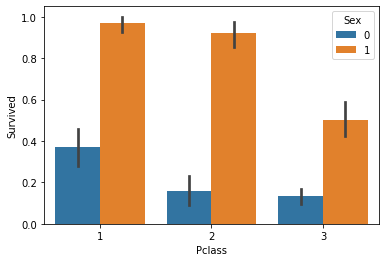

In [12]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data)

When you look at the survival rate according to the ticket rating, you can see that the higher the rating, the higher the survival rate. 
Women had a high survival rate in both ticket class 1 and 2, but men were only higher in class 1 and lower in class 2 and 3.
\
Therefore, I will categorize 'Pclass' variable and 'Sex' variable into four categories.

In [13]:
def pclass(data):
    data.loc[(data['Sex'] == 0) & (data['Pclass'] == 1), 'Pclass_C'] = 0
    data.loc[(data['Sex'] == 0) & (data['Pclass'] == 2) | (data['Pclass'] == 3), 'Pclass_C'] = 1
    data.loc[(data['Sex'] == 1) & (data['Pclass'] == 1) | (data['Pclass'] == 2), 'Pclass_C'] = 2
    data.loc[(data['Sex'] == 1) & (data['Pclass'] == 3), 'Pclass_C'] = 3
    data['Pclass_C'] = data['Pclass_C'].astype(int)

pclass(data)

### Embarked

Embarked dist.
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


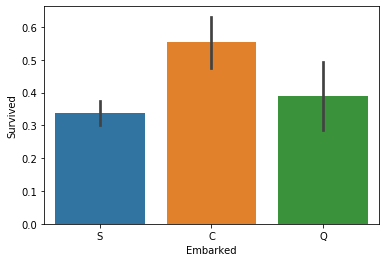

In [14]:
print('Embarked dist.\n', data['Embarked'].value_counts())
sns.barplot(x = 'Embarked', y = 'Survived', data = data)

Embarked had the highest survival rate for 'C' and the lowest for 'S'.

Since the difference between "S" and "Q" is not significant and "C" stands out, I will convert the data to 'Embarked' is "C" or not "C".

In [15]:
def embarked(data):
    data.loc[(data['Embarked'] == 'C'), 'Embarked_C'] = 0
    data.loc[(data['Embarked'] != 'C'), 'Embarked_C'] = 1
    data['Embarked_C'] = data['Embarked_C'].astype(int)

embarked(data)

### Cabin

In [16]:
print('Cabin dist.\n', data['Cabin'].value_counts())

Cabin dist.
 NA             687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
B4               1
A36              1
E17              1
A23              1
E68              1
Name: Cabin, Length: 147, dtype: int64


In [17]:
data['Cabin']

0        NA
1       C85
2        NA
3      C123
4        NA
       ... 
886      NA
887     B42
888      NA
889    C148
890      NA
Name: Cabin, Length: 889, dtype: object

When looking at Cabin, the number behind it doesn't seem important, but I think the previous letter is information that can tell the cabin's rating, so I'll just extract it.

In [18]:
data1 = data

data1['Cabin'] = data1['Cabin'].str[:1]
print(data1['Cabin'].value_counts())

N    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


The post-processing data shows the same number of missing values as before('NA' = 'N' = 687개).\
It can also be seen that values look organized, unlike previous distributions.\
Therefore, I will apply it to the original dataset and continue to analyze it.

In [19]:
data['Cabin'] = data['Cabin'].str[:1]

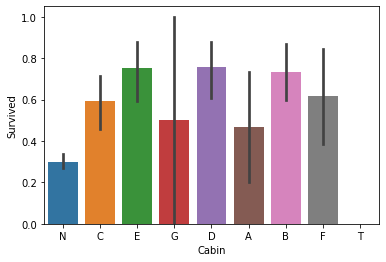

In [20]:
sns.barplot(x = 'Cabin', y = 'Survived', data = data)

Survival rates are seen in four major stages according to "Cabin". 

First, "E", "D", and "B" had the best survival rates, followed by "C" and "F". Except for NA, "G" and "A" had the lowest survival rates. 
\
I can also see that the data that were missing showed the lowest survival rate.

In [21]:
def cabin(data):
    data.loc[(data['Cabin'] == 'E') | (data['Cabin'] == 'D') | (data['Cabin'] == 'B'), 'Cabin_C'] = 0
    data.loc[(data['Cabin'] == 'C') | (data['Cabin'] == 'F'), 'Cabin_C'] = 1
    data.loc[(data['Cabin'] == 'G') | (data['Cabin'] == 'A'), 'Cabin_C'] = 2
    data.loc[(data['Cabin'] == 'N') | (data['Cabin'] == 'T'), 'Cabin_C'] = 3
    data['Cabin_C'] = data['Cabin_C'].astype(int)

cabin(data)

Next, let's check the difference in survival rates according to 'Parch' and 'SibSp'.

### Parch and SibSp

In [22]:
print(data.groupby(['Survived','Parch'])['Survived'].count())
print('\n')
print(data.groupby(['Survived','SibSp'])['Survived'].count())

Survived  Parch
0         0        445
          1         53
          2         40
          3          2
          4          4
          5          4
          6          1
1         0        231
          1         65
          2         40
          3          3
          5          1
Name: Survived, dtype: int64


Survived  SibSp
0         0        398
          1         97
          2         15
          3         12
          4         15
          5          5
          8          7
1         0        208
          1        112
          2         13
          3          4
          4          3
Name: Survived, dtype: int64


The most important difference is that the survival rate is low when Parch and SibSp are zero('0'). \
In other cases, there was no significant difference between survival and death. 

Therefore, I will create a new variable 'Family Number' that combines Parch and SibSp for analysis.

In [23]:
def family(data):
    data['Family_N'] = data['Parch'] + data['SibSp']
    data['Family_N'] = data['Family_N'].astype(int)

family(data)

[ 1  0  4  2  6  5  3  7 10]


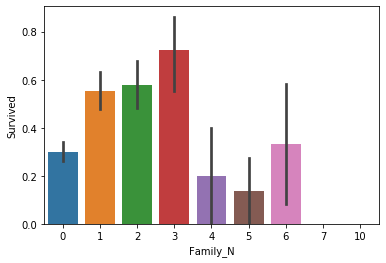

In [24]:
print(data['Family_N'].unique())

sns.barplot(x = 'Family_N', y = 'Survived', data = data)

The new variable "Family_N" shows a difference in survival rates. The new variable confirmed that the survival rate was low, especially at values 0 and above 4.

### Fare

[  0.       4.0125   5.       6.2375   6.4375   6.45     6.4958   6.75
   6.8583   6.95     6.975    7.0458   7.05     7.0542   7.125    7.1417
   7.225    7.2292   7.25     7.3125   7.4958   7.5208   7.55     7.6292
   7.65     7.725    7.7292   7.7333   7.7375   7.7417   7.75     7.775
   7.7875   7.7958   7.8      7.8292   7.8542   7.875    7.8792   7.8875
   7.8958   7.925    8.0292   8.05     8.1125   8.1375   8.1583   8.3
   8.3625   8.4042   8.4333   8.4583   8.5167   8.6542   8.6625   8.6833
   8.7125   8.85     9.       9.2167   9.225    9.35     9.475    9.4833
   9.5      9.5875   9.825    9.8375   9.8417   9.8458  10.1708  10.4625
  10.5     10.5167  11.1333  11.2417  11.5     12.      12.275   12.2875
  12.35    12.475   12.525   12.65    12.875   13.      13.4167  13.5
  13.7917  13.8583  13.8625  14.      14.1083  14.4     14.4542  14.4583
  14.5     15.      15.0458  15.05    15.1     15.2458  15.5     15.55
  15.7417  15.75    15.85    15.9     16.      16.1     16.7  

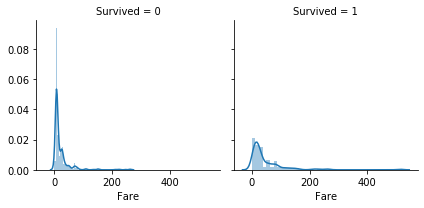

In [25]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, "Fare")

f = data['Fare'].unique()
f.sort()
print(f)

When I checked the value of "Fare," I could see that the value was diverse, and in detail, it was especially concentrated in the front. \
Accordingly, I will check the survival rate by dividing categories into 0-10, 10-30, 30-70, 70-150, 150~.

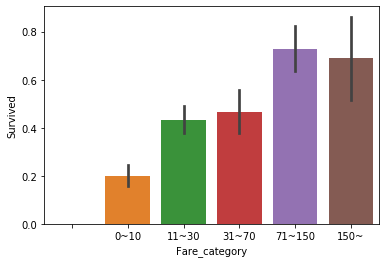

In [26]:
def category(fare):
    cat = ''
    if fare <= -1: cat = ' '
    elif fare <= 10: cat = '0~10'
    elif fare <= 30: cat = '11~30'
    elif fare <= 70: cat = '31~70'
    elif fare <= 150: cat = '71~150'
    else : cat = '150~'
    
    return cat

group_names = [' ', '0~10', '11~30', '31~70', '71~150', '150~']

data['Fare_category'] = data['Fare'].apply(lambda x : category(x))
sns.barplot(x = 'Fare_category', y = 'Survived', data = data, order = group_names)
data.drop('Fare_category', axis=1, inplace=True)

After checking, I decided that I could categorize it into three categories, so I will categorize the 'Fare' category accordingly.

In [27]:
def fare(data):
    data.loc[data['Fare'] <= 10, 'Fare_C'] = 0
    data.loc[(data['Fare'] > 10) & (data['Fare'] <= 70), 'Fare_C'] = 1
    data.loc[data['Fare'] > 70, 'Fare_C'] = 2
    data['Fare_C'] = data['Fare_C'].astype(int)

fare(data)

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_C,Pclass_C,Embarked_C,Cabin_C,Family_N,Fare_C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,N,S,3.0,1,1,3,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,C,5.0,2,0,1,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,N,S,4.0,3,1,3,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C,S,4.0,2,1,1,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,N,S,4.0,1,1,3,0,0


Now, let's drop the variables that are not used.

In [29]:
features_drop = ['Name', 'Pclass','Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
data = data.drop(features_drop, axis = 1)
data = data.drop('PassengerId', axis = 1)

In [30]:
data.head()

,Survived,Sex,Age_C,Pclass_C,Embarked_C,Cabin_C,Family_N,Fare_C
0,0,0,3.0,1,1,3,1,0
1,1,1,5.0,2,0,1,1,2
2,1,1,4.0,3,1,3,0,0
3,1,1,4.0,2,1,1,1,1
4,0,0,4.0,1,1,3,0,0


## 2-3. Process test data

Now I will process the test data in the same way.

In [31]:
test = pd.read_csv('./titanic/test.csv')

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Pre-processing test data as previously done with train data.
\
Age: use Mean / Fare: drop rows / Cabin: fill with 'NA'

In [33]:
test['Age'].fillna(test['Age'].mean(), inplace = True)
test['Cabin'].fillna('NA',inplace = True)
test = test.dropna(axis = 0, subset=['Fare'], how='any')

In [34]:
test['Cabin'] = test['Cabin'].str[:1]
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,N,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,N,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,N,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,N,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,N,S


In [35]:
# Processing Variable
age(test)
sex(test)
family(test)
fare(test)
cabin(test)
embarked(test)
pclass(test)

In [36]:
test = test.drop(features_drop, axis = 1)
test.head()

,PassengerId,Sex,Age_C,Family_N,Fare_C,Cabin_C,Embarked_C,Pclass_C
0,892,0,4.0,0,0,3,1,1
1,893,1,5.0,1,0,3,1,3
2,894,0,6.0,0,0,3,1,2
3,895,0,4.0,0,0,3,1,1
4,896,1,3.0,2,1,3,1,3


# 3. Modeling

## 3-1. Scaling
To make values easier to compare and analyze and to prevent overflow or underflow, I will use the most basic scaling technique, **'StandardScaler'**.

In [37]:
from sklearn.preprocessing import StandardScaler

def scaling(data):
    data['Sex'] = StandardScaler().fit_transform(data['Sex'].values.reshape(-1, 1))
    data['Family_N'] = StandardScaler().fit_transform(data['Family_N'].values.reshape(-1, 1))
    data['Embarked_C'] = StandardScaler().fit_transform(data['Embarked_C'].values.reshape(-1, 1))
    data['Cabin_C'] = StandardScaler().fit_transform(data['Cabin_C'].values.reshape(-1, 1))
    data['Pclass_C'] = StandardScaler().fit_transform(data['Pclass_C'].values.reshape(-1, 1))
    data['Age_C'] = StandardScaler().fit_transform(data['Age_C'].values.reshape(-1, 1))
    data['Fare_C'] = StandardScaler().fit_transform(data['Fare_C'].values.reshape(-1, 1))

In [38]:
scaling(data)
scaling(test)

In [39]:
data_n = data.drop('Survived', axis=1)
label = data['Survived']
test_n = test.drop('PassengerId', axis = 1).copy()

data_n.head()

,Sex,Age_C,Pclass_C,Embarked_C,Cabin_C,Family_N,Fare_C
0,-0.735342,-0.489502,-0.539779,0.482711,0.516809,0.057853,-1.131738
1,1.359911,1.032062,0.545885,-2.071634,-1.347058,0.057853,1.935686
2,1.359911,0.271280,1.631548,0.482711,0.516809,-0.561804,-1.131738
3,1.359911,0.271280,0.545885,0.482711,-1.347058,0.057853,0.401974
4,-0.735342,0.271280,-0.539779,0.482711,0.516809,-0.561804,-1.131738


In [40]:
label.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
data_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Sex         889 non-null    float64
 1   Age_C       889 non-null    float64
 2   Pclass_C    889 non-null    float64
 3   Embarked_C  889 non-null    float64
 4   Cabin_C     889 non-null    float64
 5   Family_N    889 non-null    float64
 6   Fare_C      889 non-null    float64
dtypes: float64(7)
memory usage: 95.6 KB


## 3-2. Select Model

In this work, I will use the following 5 methods as prediction models.

1. Logistic Regression
2. Support Vector Machine (SVM)
3. k-Nearest Neighbor (kNN)
4. Random Forest
5. Naive Bayes


In [42]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB


In [43]:
def train_and_test(model): 
    model.fit(data_n, label) 
    prediction = model.predict(test_n) 
    accuracy = round(model.score(data_n, label) * 100, 2)
    print('Test Accuracy : %.3f' %(model.score(data_n, label)))
    return prediction

In [44]:
svm_pred = train_and_test(SVC()) 
nb_pred = train_and_test(GaussianNB())
rf_pred = train_and_test(RandomForestClassifier(n_estimators = 150))
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 6)) 
log_pred = train_and_test(LogisticRegression()) 

Test Accuracy : 0.837
Test Accuracy : 0.792
Test Accuracy : 0.881
Test Accuracy : 0.848
Test Accuracy : 0.811


Since the accuracy in **RandomForestClassifier** was the best, I will submit this result value to the kaggle.

## 3-3. Submission

In [45]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": rf_pred
    })

submission.to_csv('submission_titanic_test1.csv', index=False)
submission = pd.read_csv('submission_test1.csv')
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
